In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle

Para analizar la variabilidad de los viajes, usamos los datos del metro:

In [3]:
datametro = pd.read_csv("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/afluenciastc_simple_02_2023.csv",
                       parse_dates = ['fecha'], encoding = 'latin')

La EOD fue hecha del 23 de enero al 3 de marzo de 2017. Comparamos los datos de afluencia de estas fechas con el mismo periodo en 2020.

In [6]:
d = datametro

In [7]:
data2017 = d[("2017-01-23" <= d['fecha']) & ( d['fecha'] <= "2017-03-03")]
data2020 = d[("2020-01-27" <= d['fecha']) & ( d['fecha'] <= "2020-03-06")]

Obtenemos los datos que corresponden a fechas entre semana.

In [8]:
ES2017 = data2017[data2017['fecha'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
ES2020 = data2020[data2020['fecha'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [9]:
ES2017 = ES2017.groupby(['fecha', 'estacion']).sum() # los agrupamos por estación para que estén ordenadas por estación.
ES2020 = ES2020.groupby(['fecha', 'estacion']).sum()

Realizamos la prueba, donde la hipótesis nula es que las dos muestras vienen de la misma distribución.

In [10]:
stats.ks_2samp(ES2017['afluencia'], ES2020['afluencia'])

KstestResult(statistic=0.045807770961145196, pvalue=6.9768018963836e-05)

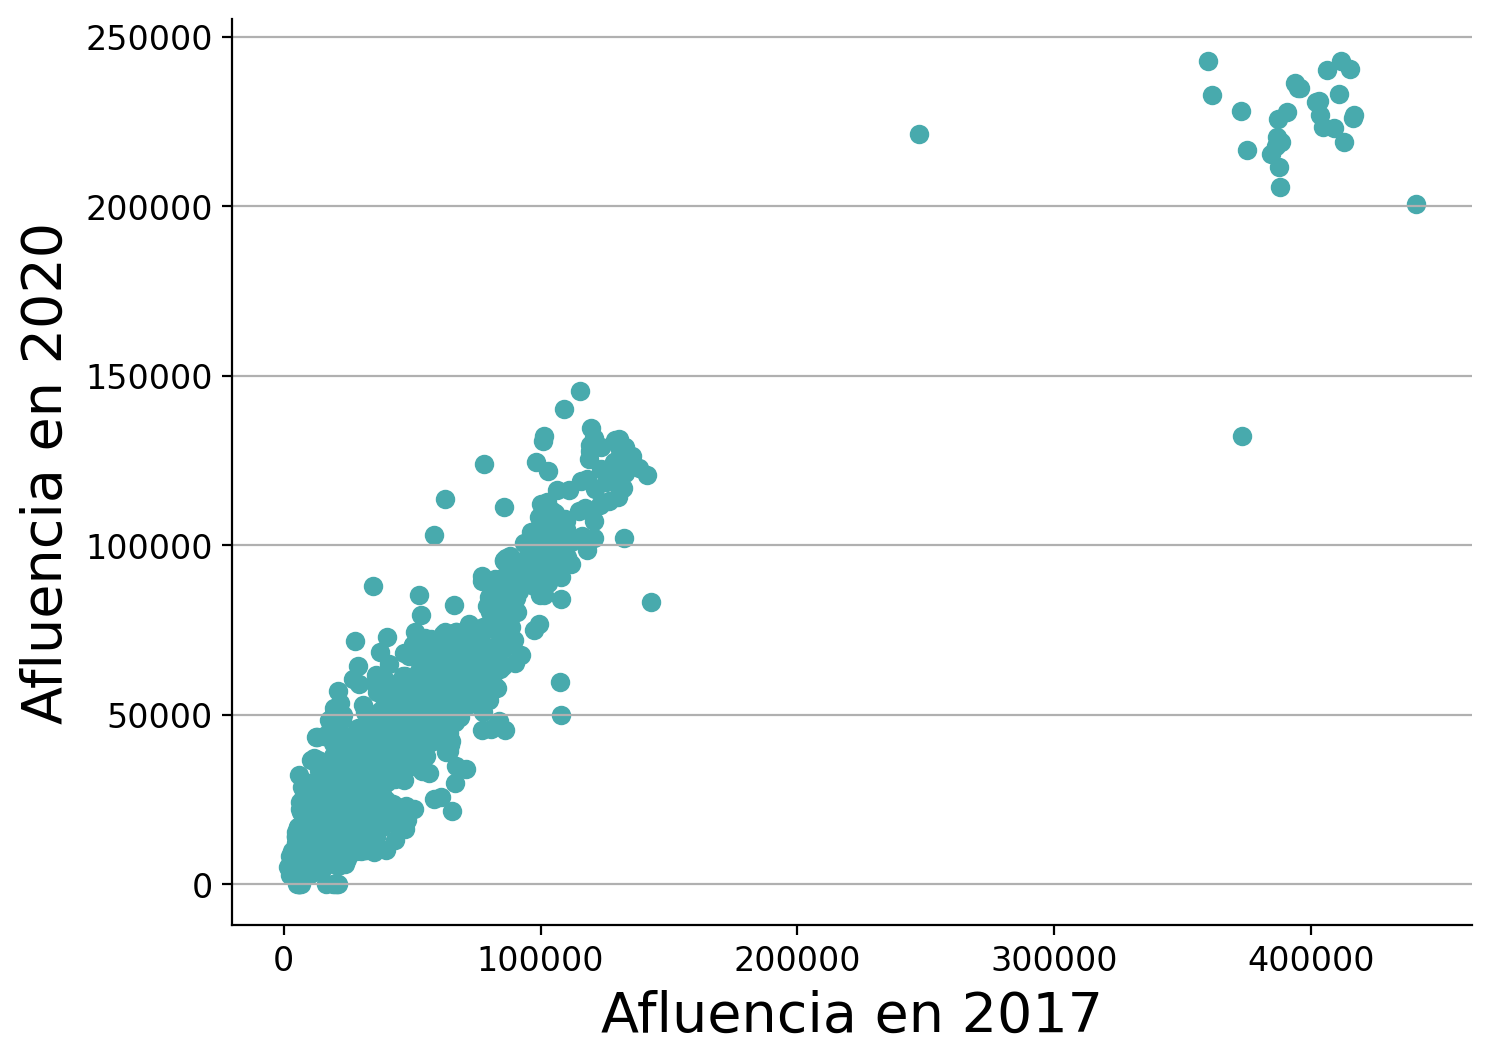

In [16]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)

ax.scatter(ES2017['afluencia'], ES2020['afluencia'], color = '#48aaad')
ax.set_xlabel("Afluencia en 2017", fontsize = 20)
ax.set_ylabel("Afluencia en 2020", fontsize = 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis = 'y')
plt.show()

In [18]:
stats.pearsonr(ES2017['afluencia'], ES2020['afluencia'])

(0.9308647028552162, 0.0)

In [19]:
data = pd.DataFrame({'2020':ES2020['afluencia'].to_numpy(), '2017':ES2017['afluencia'].to_numpy()})

In [20]:
data = data[(data['2020'] > 0) & (data['2017']>0)]

In [21]:
α = data['2020'] / data['2017']

In [22]:
xt = np.log(α)

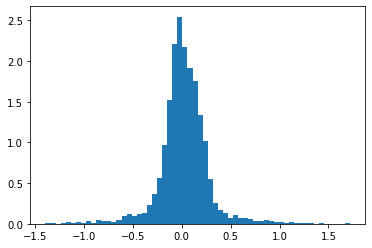

In [23]:
plt.hist(xt, bins = 60, density = True)

plt.show()

In [31]:
dist = stats.t
fit = dist.fit(xt)

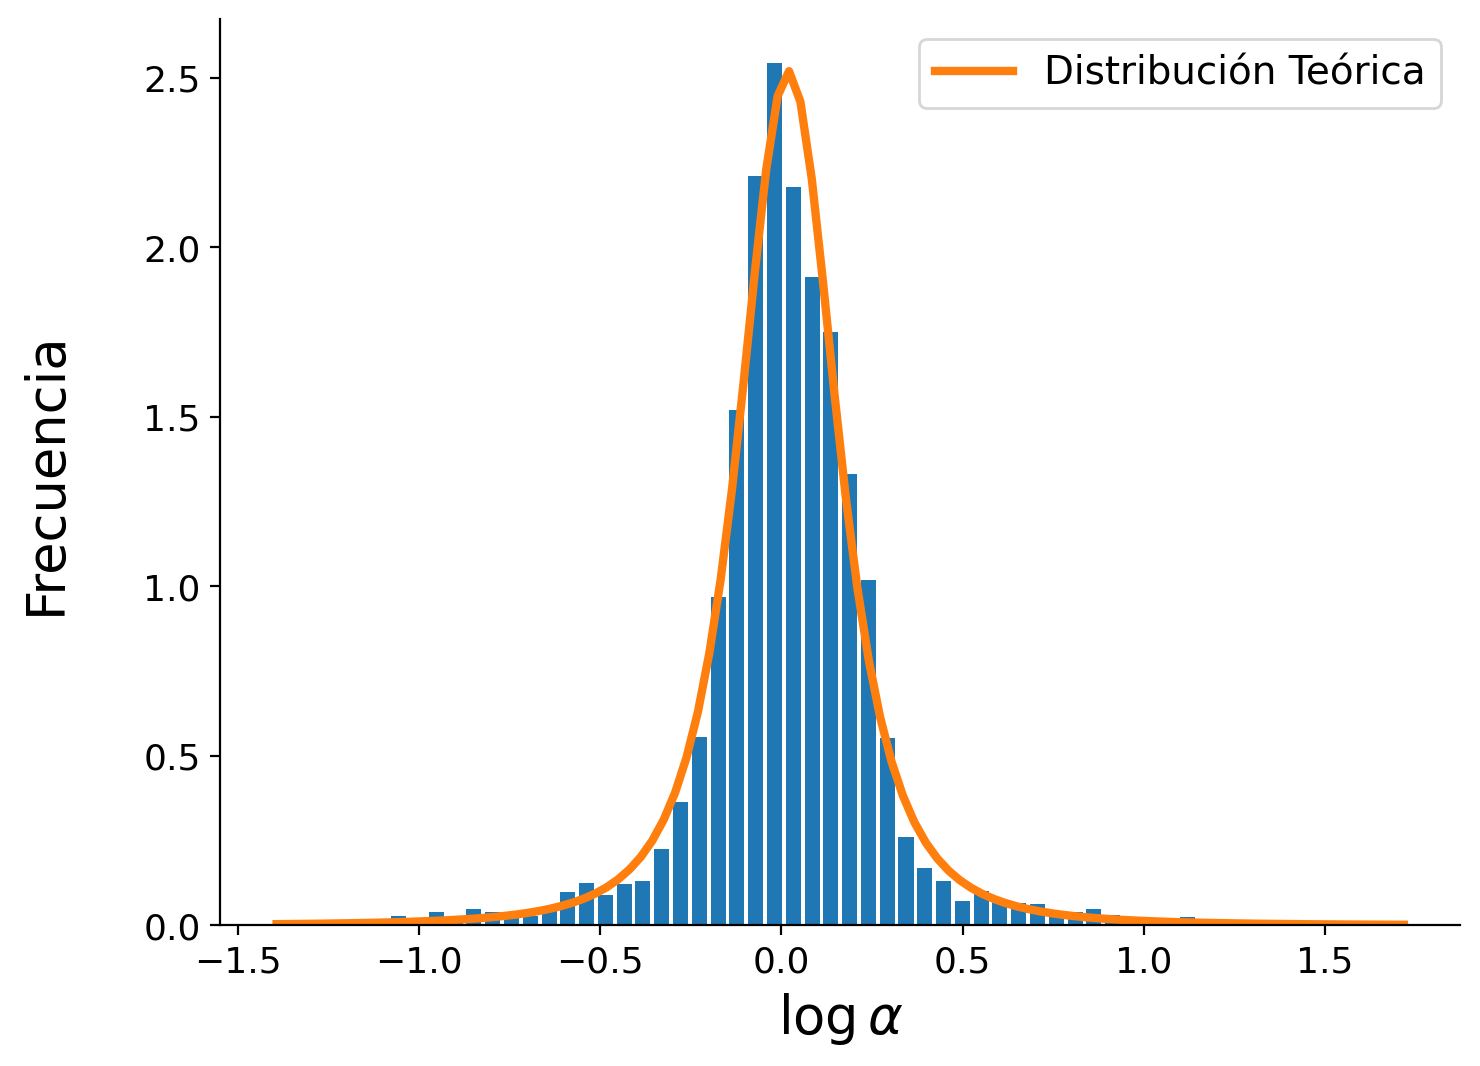

In [32]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)

t = np.linspace(xt.min(), xt.max(), 100)

ax.hist(xt, density = True, bins = 60, rwidth = 0.8)
ax.plot(t, dist.pdf(t, *fit), linewidth = 3, label = 'Distribución Teórica')

ax.spines[['right', 'top']].set_visible(False)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

ax.set_xlabel(r'$\log{\alpha}$', fontsize = 19)
ax.set_ylabel('Frecuencia\n', fontsize = 19)
ax.legend(prop = {'size':14})
plt.show()

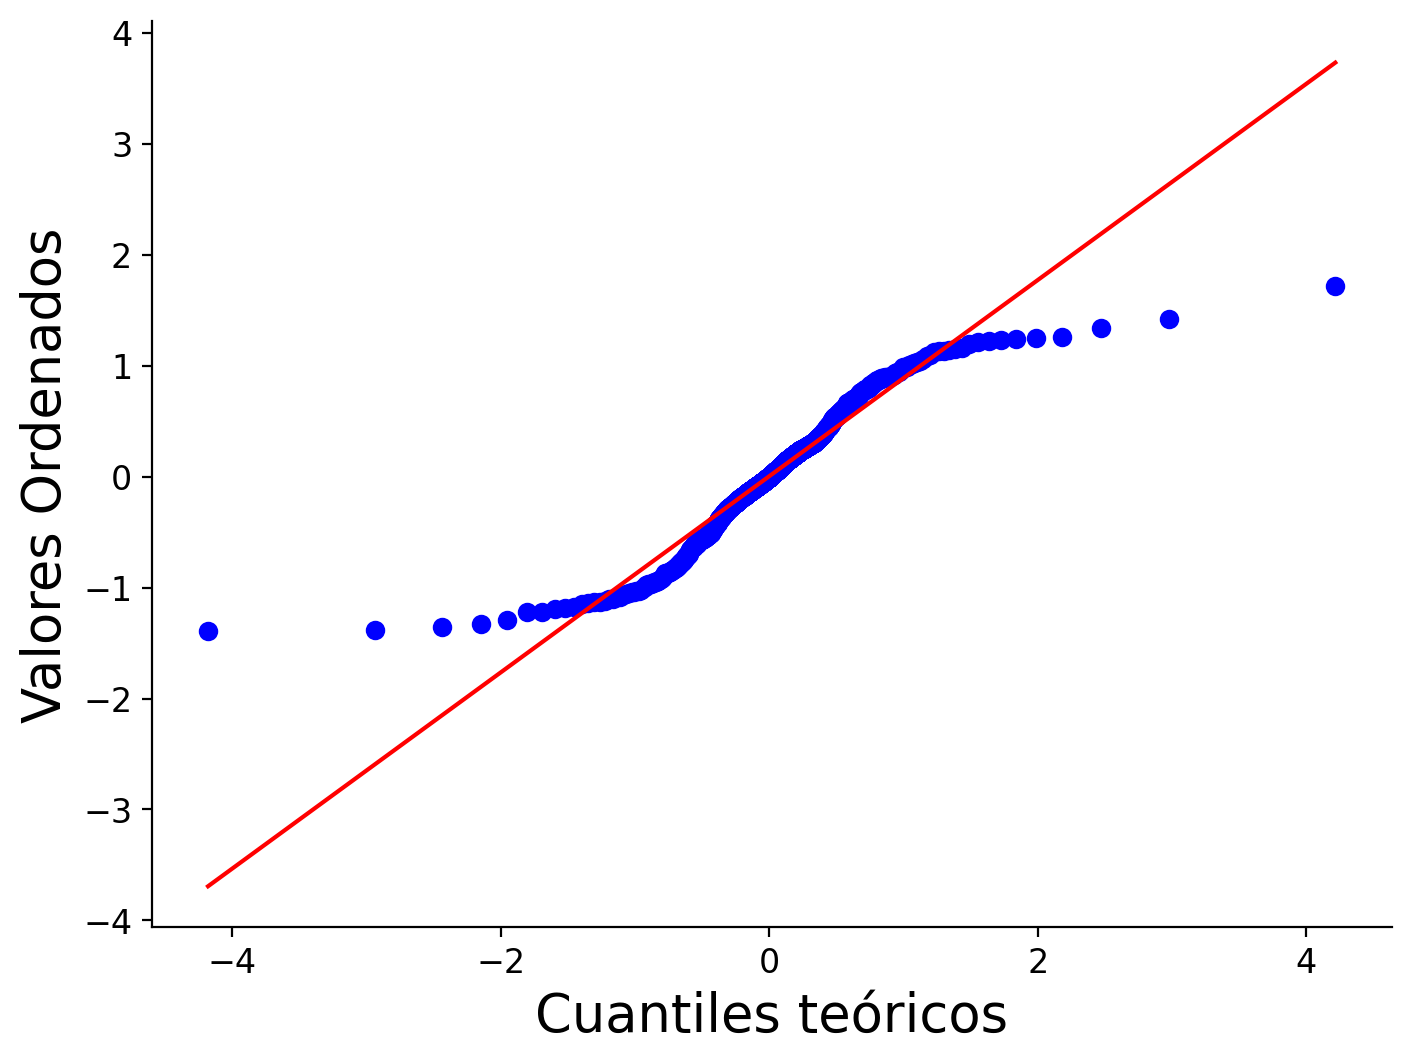

In [34]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)

stats.probplot(xt, dist="t", sparams =(*fit,), plot = ax)
ax.spines[['right', 'top']].set_visible(False)

ax.set_title('')
ax.set_ylabel('Valores Ordenados', fontsize = 19)
ax.set_xlabel('Cuantiles teóricos', fontsize = 19)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [33]:
stats.kstest(xt, dist.cdf, args = (*fit,) )

KstestResult(statistic=0.01790512721230486, pvalue=0.08647110858496554)

In [35]:
fit

(2.5358300265866967, 0.01915009416316822, 0.14378976740604377)

In [2022]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/results/ajuste_anualEntreSemana.pkl", "wb") as handle:
    pickle.dump(fit, handle)

In [1830]:
S2017 = data2017[data2017['fecha'].dt.day_name().isin(['Saturday'])]
S2020 = data2020[data2020['fecha'].dt.day_name().isin(['Saturday'])]

In [1831]:
stats.ks_2samp(S2017['afluencia'], S2020['afluencia'])

KstestResult(statistic=0.03777777777777778, pvalue=0.4228853713796753)

In [1832]:
D2017 = data2017[data2017['fecha'].dt.day_name().isin(['Sunday'])]
D2020 = data2020[data2020['fecha'].dt.day_name().isin(['Sunday'])]

In [1833]:
stats.ks_2samp(D2017['afluencia'], D2020['afluencia'])

KstestResult(statistic=0.03572649572649573, pvalue=0.49411400729265187)

In [1790]:
Q32020 = np.percentile(data2020['afluencia'], 75)
Q12020 = np.percentile(data2020['afluencia'], 25)

IQR2020 = Q32020 - Q12020

In [1791]:
d2020 = data2020[(data2020['afluencia'] >= Q12020 - 1.5*IQR2020) & ( data2020['afluencia'] <= Q32020 + 1.5*IQR2020)]

In [1792]:
Q32017 = np.percentile(data2017['afluencia'], 75)
Q12017 = np.percentile(data2017['afluencia'], 25)

IQR2017 = Q32017 - Q12017

In [1793]:
d2017 = data2017[(data2017['afluencia'] >= Q12017 - 1.5*IQR2017) & ( data2017['afluencia'] <= Q32017 + 1.5*IQR2017)]

In [1794]:
stats.ks_2samp(d2017['afluencia'], d2020['afluencia'])

KstestResult(statistic=0.019513417931307175, pvalue=0.1219227735469447)

ValueError: X must have 2 or fewer dimensions

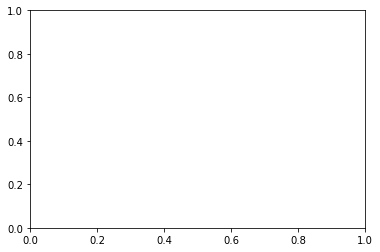

In [1778]:
plt.boxplot([data2017, data2020])

plt.show()

In [1617]:
data = pd.DataFrame({'año2017': data2017.to_numpy(), 'año2020': data2020.to_numpy()})

In [1691]:
Q32020 = np.percentile(data['año2020'], 75)
Q12020 = np.percentile(data['año2020'], 25)

IQR2020 = Q32020 - Q12020

In [1692]:
Q32017 = np.percentile(data['año2017'], 75)
Q12017 = np.percentile(data['año2017'], 25)

IQR2017 = Q32017 - Q12017

In [1693]:
temp = data[(data['año2017'] >= Q12017 - 1.5*IQR2017) & ( data['año2017'] <= Q32017 + 1.5*IQR2017)]

In [1694]:
data = temp[temp['año2020'].between(Q12020 - 1.5*IQR2020, Q32020 + 1.5*IQR2020)]

In [1619]:
data = data[(data.año2017 > 0) & (data.año2020>0)]

In [1695]:
data

,año2017,año2020
0,13231,14580
1,17118,17419
2,8529,7573
3,10553,9790
4,27779,27933
...,...,...
6514,22004,22692
6515,26158,27066
6516,53388,36055
6517,14374,15905


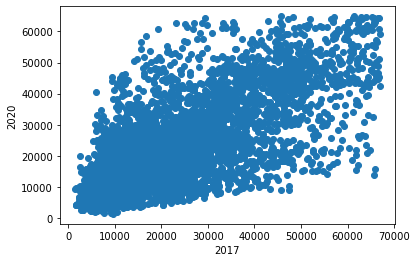

In [1696]:
plt.scatter(data['año2017'], data['año2020'])

plt.xlabel('2017')
plt.ylabel('2020')

plt.show()

In [1697]:
stats.pearsonr(data['año2020'], data['año2017'])

(0.7225231750988466, 0.0)

In [1698]:
β = data['año2017']/data['año2020']
β = β.to_numpy()

In [1699]:
Q3 = np.percentile(β, 75)
Q1 = np.percentile(β, 25)

IQR = Q3 - Q1

In [1700]:
β = β[(β > Q1-1.5*IQR) & (β < Q3 + 1.5*IQR)]

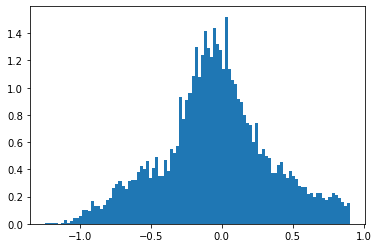

In [1701]:
fig, ax = plt.subplots()

xt, lam = stats.boxcox(β)

ax.hist(xt, bins = 100, density = True)

plt.show()

In [1656]:
len(β)

6023

In [1707]:
dist = stats.cauchy
fit = dist.fit(xt)

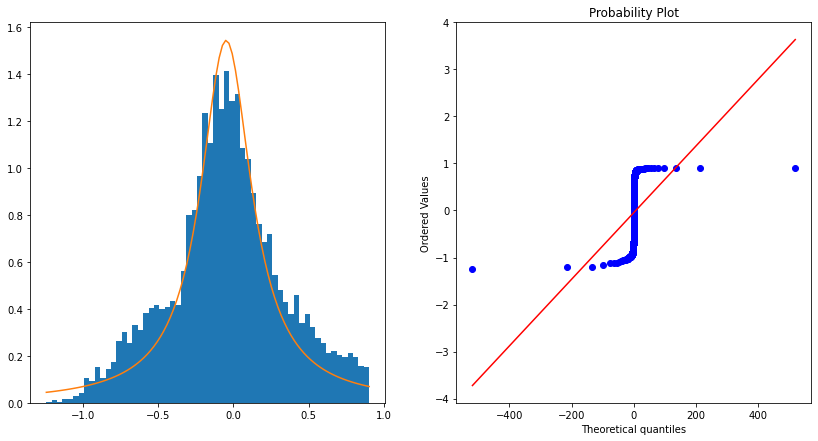

In [1708]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))

t = np.linspace(xt.min(), xt.max(), 100)

ax[0].hist(xt, bins = 60, density = True)
ax[0].plot(t, dist.pdf(t, *fit) )
stats.probplot(xt, dist=dist, sparams =(*fit,), plot = ax[1])

plt.show()

In [1709]:
stats.kstest(xt, dist.cdf, args = (*fit,))

KstestResult(statistic=0.06798773767275401, pvalue=1.761198608167115e-22)

In [1441]:
fobs = dist.rvs(*fit, size = len(β))

In [1442]:
stats.chisquare(xt, fobs, ddof = 3)

Power_divergenceResult(statistic=18158.048820484055, pvalue=0.0)